#Cafe Customer Reviews Analysis
Data Source: https://www.kaggle.com/code/veronikakajling/cafe-customer-satisfaction-exploratory-analysis/input

Anggota Kelompok:

1. Deviyanti Kusumawati / 2207411003
2. Heical Chandra Syahputra / 2107411022
3. Made Dharmagiri / 2207411009
4. Rio Aditya Mukti / 2207411020
5. Syifa Azzahirah / 2207411024
6. Visca Chaerunnisa Bachri / 2207411007

#1. Import Libraries & Dataset

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
print("Libraries are successfully imported!")

Libraries are successfully imported!


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cafe_df = pd.read_csv('/content/drive/My Drive/Customer-survey-data.csv')
cafe_df.head()

,Customer,How satisfied were you with your overall delivery experience at Ali? 1-5 where 1 = extremely dissatisfied and 5 = extremely satisfied,How satisfied were you with the quality of the food at Alis? 1-5 where 1 = extremely dissatisfied and 5 = extremely satisfied,How satisfied were you with the speed of delivery at Alis? 1-5 where 1 = extremely dissatisfied and 5 = extremely satisfied,Was your order accurate? Please respond yes or no.
0,1,5.0,3.0,4.0,Yes
1,2,3.0,4.0,3.0,Yes
2,3,4.0,5.0,2.0,Yes
3,4,5.0,3.0,4.0,Yes
4,5,2.0,5.0,1.0,Yes


#2. Data Exploration

In [ ]:
cafe_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10616 entries, 0 to 10615
Data columns (total 5 columns):
 #   Column                                                                                                                                                      Non-Null Count  Dtype  
---  ------                                                                                                                                                      --------------  -----  
 0   Customer                                                                                                                                                    10616 non-null  int64  
 1   How satisfied were you with your overall delivery experience at Ali?                    1-5 where 1 = extremely dissatisfied and 5 = extremely satisfied    10198 non-null  float64
 2   How satisfied were you with the quality of the food at Alis?                             1-5 where 1 = extremely dissatisfied and 5 = extremely sat

In [ ]:
# Checking the null entries
cafe_df.isna().sum()

,0
Customer,0
How satisfied were you with your overall delivery experience at Ali? 1-5 where 1 = extremely dissatisfied and 5 = extremely satisfied,418
How satisfied were you with the quality of the food at Alis? 1-5 where 1 = extremely dissatisfied and 5 = extremely satisfied,252
How satisfied were you with the speed of delivery at Alis? 1-5 where 1 = extremely dissatisfied and 5 = extremely satisfied,239
Was your order accurate? Please respond yes or no.,660


In [ ]:
# Checking the unique values
cafe_df.nunique()

,0
Customer,10616
How satisfied were you with your overall delivery experience at Ali? 1-5 where 1 = extremely dissatisfied and 5 = extremely satisfied,5
How satisfied were you with the quality of the food at Alis? 1-5 where 1 = extremely dissatisfied and 5 = extremely satisfied,5
How satisfied were you with the speed of delivery at Alis? 1-5 where 1 = extremely dissatisfied and 5 = extremely satisfied,5
Was your order accurate? Please respond yes or no.,2


In [ ]:
cafe_df.describe()

,Customer,How satisfied were you with your overall delivery experience at Ali? 1-5 where 1 = extremely dissatisfied and 5 = extremely satisfied,How satisfied were you with the quality of the food at Alis? 1-5 where 1 = extremely dissatisfied and 5 = extremely satisfied,How satisfied were you with the speed of delivery at Alis? 1-5 where 1 = extremely dissatisfied and 5 = extremely satisfied
count,10616.000000,10198.000000,10364.000000,10377.000000
mean,5308.500000,3.325260,3.332015,3.322926
std,3064.719563,1.419754,1.414709,1.408918
min,1.000000,1.000000,1.000000,1.000000
25%,2654.750000,2.000000,2.000000,2.000000
50%,5308.500000,3.000000,3.000000,3.000000
75%,7962.250000,5.000000,5.000000,5.000000
max,10616.000000,5.000000,5.000000,5.000000


In [ ]:
# Checking the Duplicates
cafe_df.duplicated().sum()

0

In [ ]:
# Checking the Data Types
cafe_df.dtypes

,0
Customer,int64
How satisfied were you with your overall delivery experience at Ali? 1-5 where 1 = extremely dissatisfied and 5 = extremely satisfied,float64
How satisfied were you with the quality of the food at Alis? 1-5 where 1 = extremely dissatisfied and 5 = extremely satisfied,float64
How satisfied were you with the speed of delivery at Alis? 1-5 where 1 = extremely dissatisfied and 5 = extremely satisfied,float64
Was your order accurate? Please respond yes or no.,object


#3. Data Cleaning

In [ ]:
# For the ratings we have some missing values. I'm going to do imputation with the median values.
numeric_cols = cafe_df.select_dtypes(include=['number'])
cafe_df[numeric_cols.columns] = cafe_df[numeric_cols.columns].fillna(numeric_cols.median())

In [ ]:
# Fill the missing values in the category column (ex: using mode or 'Unknown')
cafe_df['Was your order accurate? Please respond yes or no.'] = cafe_df['Was your order accurate? Please respond yes or no.'].fillna(cafe_df['Was your order accurate? Please respond yes or no.'].mode()[0])

In [ ]:
cafe_df.isnull().sum()

,0
Customer,0
How satisfied were you with your overall delivery experience at Ali? 1-5 where 1 = extremely dissatisfied and 5 = extremely satisfied,0
How satisfied were you with the quality of the food at Alis? 1-5 where 1 = extremely dissatisfied and 5 = extremely satisfied,0
How satisfied were you with the speed of delivery at Alis? 1-5 where 1 = extremely dissatisfied and 5 = extremely satisfied,0
Was your order accurate? Please respond yes or no.,0


In [ ]:
# The formula to detect the outlier using IQR
def detect_outliers_iqr(df):
    outlier_info = {}
    for col in df.select_dtypes(include=['number']).columns:
        Q1 = df[col].quantile(0.25)  # Q1
        Q3 = df[col].quantile(0.75)  # Q3
        IQR = Q3 - Q1  # Interquartile Range
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Identify data outside the IQR limits
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        outlier_info[col] = len(outliers)

    return outlier_info

# Displays the number of outliers for each numeric column
outliers = detect_outliers_iqr(cafe_df)
print("Jumlah outlier pada setiap kolom numerik:", outliers)

Jumlah outlier pada setiap kolom numerik: {'Customer': 0, 'How satisfied were you with your overall delivery experience at Ali?                    1-5 where 1 = extremely dissatisfied and 5 = extremely satisfied': 0, 'How satisfied were you with the quality of the food at Alis?                             1-5 where 1 = extremely dissatisfied and 5 = extremely satisfied': 0, 'How satisfied were you with the speed of delivery at Alis?                                1-5 where 1 = extremely dissatisfied and 5 = extremely satisfied': 0}


#4. Descriptive Statistics

In [ ]:
# Fungsi untuk membuat ringkasan statistik deskriptif
def generate_summary_statistics(df):
    summary_data = []

    for col in df.select_dtypes(include=['number']).columns:
        count = df[col].count()  # Jumlah data yang tersedia (bukan NaN)
        mean = df[col].mean()  # Rata-rata
        median = df[col].median()  # Median
        mode = df[col].mode()[0]  # Modus (nilai yang paling sering muncul)
        min_val = df[col].min()  # Nilai minimum
        max_val = df[col].max()  # Nilai maksimum
        range_val = max_val - min_val  # Rentang nilai
        variance = df[col].var()  # Variansi
        std_dev = df[col].std()  # Standar deviasi

        summary_data.append([col, count, mean, median, mode, min_val, max_val, range_val, variance, std_dev])

    # Membuat DataFrame untuk output dengan tampilan tabel
    summary_df = pd.DataFrame(summary_data, columns=[
        'Kolom', 'Frekuensi', 'Mean', 'Median', 'Modus', 'Min', 'Max', 'Range', 'Variansi', 'Std Dev'
    ]).set_index('Kolom')

    return summary_df

# Menjalankan fungsi dan menampilkan hasil dalam bentuk tabel
summary_df = generate_summary_statistics(cafe_df)
summary_df.head()

,Frekuensi,Mean,Median,Modus,Min,Max,Range,Variansi,Std Dev
Kolom,,,,,,,,,
Customer,10616,5308.500000,5308.5,1.0,1.0,10616.0,10615.0,9.392506e+06,3064.719563
How satisfied were you with your overall delivery experience at Ali? 1-5 where 1 = extremely dissatisfied and 5 = extremely satisfied,10616,3.312453,3.0,5.0,1.0,5.0,4.0,1.940329e+00,1.392957
How satisfied were you with the quality of the food at Alis? 1-5 where 1 = extremely dissatisfied and 5 = extremely satisfied,10616,3.324133,3.0,5.0,1.0,5.0,4.0,1.956444e+00,1.398730
How satisfied were you with the speed of delivery at Alis? 1-5 where 1 = extremely dissatisfied and 5 = extremely satisfied,10616,3.315656,3.0,5.0,1.0,5.0,4.0,1.942651e+00,1.393790


#5. Data Visualization

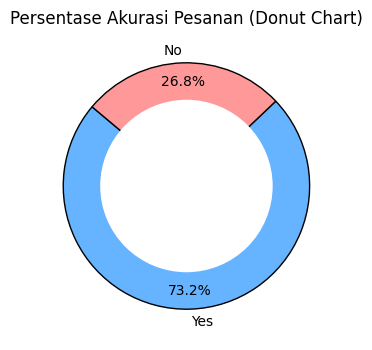

In [ ]:
# Menghitung jumlah jawaban "Yes" dan "No" pada kolom akurasi pesanan
order_accuracy_counts = cafe_df['Was your order accurate? Please respond yes or no.'].value_counts()

# Membuat donut chart
plt.figure(figsize=(4, 4))
plt.pie(order_accuracy_counts, labels=order_accuracy_counts.index, autopct='%1.1f%%',
        startangle=140, wedgeprops={'edgecolor': 'black'}, pctdistance=0.85, colors=['#66b3ff', '#ff9999'])

# Menambahkan lingkaran di tengah agar menjadi donut chart
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
plt.gca().add_artist(centre_circle)

# Menambahkan judul
plt.title("Persentase Akurasi Pesanan (Donut Chart)")
plt.show()

<ipython-input-16-d61823b09610>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=order_accuracy_counts.index, y=order_accuracy_counts.values, palette=['#66b3ff', '#ff9999'])


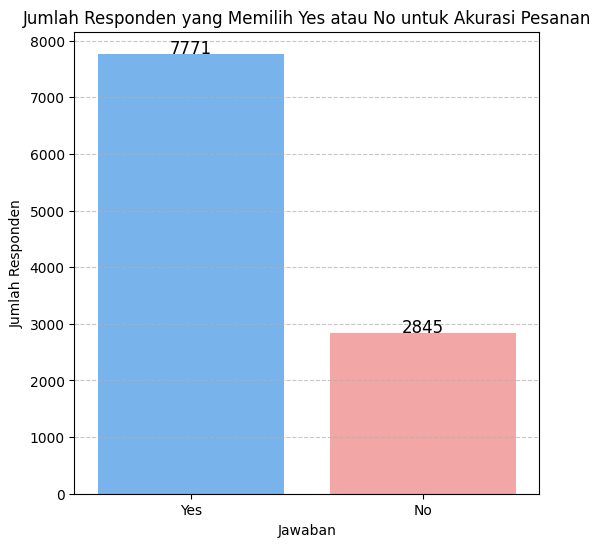

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Menghitung jumlah jawaban "Yes" dan "No"
order_accuracy_counts = cafe_df['Was your order accurate? Please respond yes or no.'].value_counts()

# Membuat diagram batang
plt.figure(figsize=(6, 6))
sns.barplot(x=order_accuracy_counts.index, y=order_accuracy_counts.values, palette=['#66b3ff', '#ff9999'])

# Menambahkan label dan judul
plt.xlabel("Jawaban")
plt.ylabel("Jumlah Responden")
plt.title("Jumlah Responden yang Memilih Yes atau No untuk Akurasi Pesanan")
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Menampilkan nilai di atas batang
for i, value in enumerate(order_accuracy_counts.values):
    plt.text(i, value + 10, str(value), ha='center', fontsize=12)

# Menampilkan plot
plt.show()

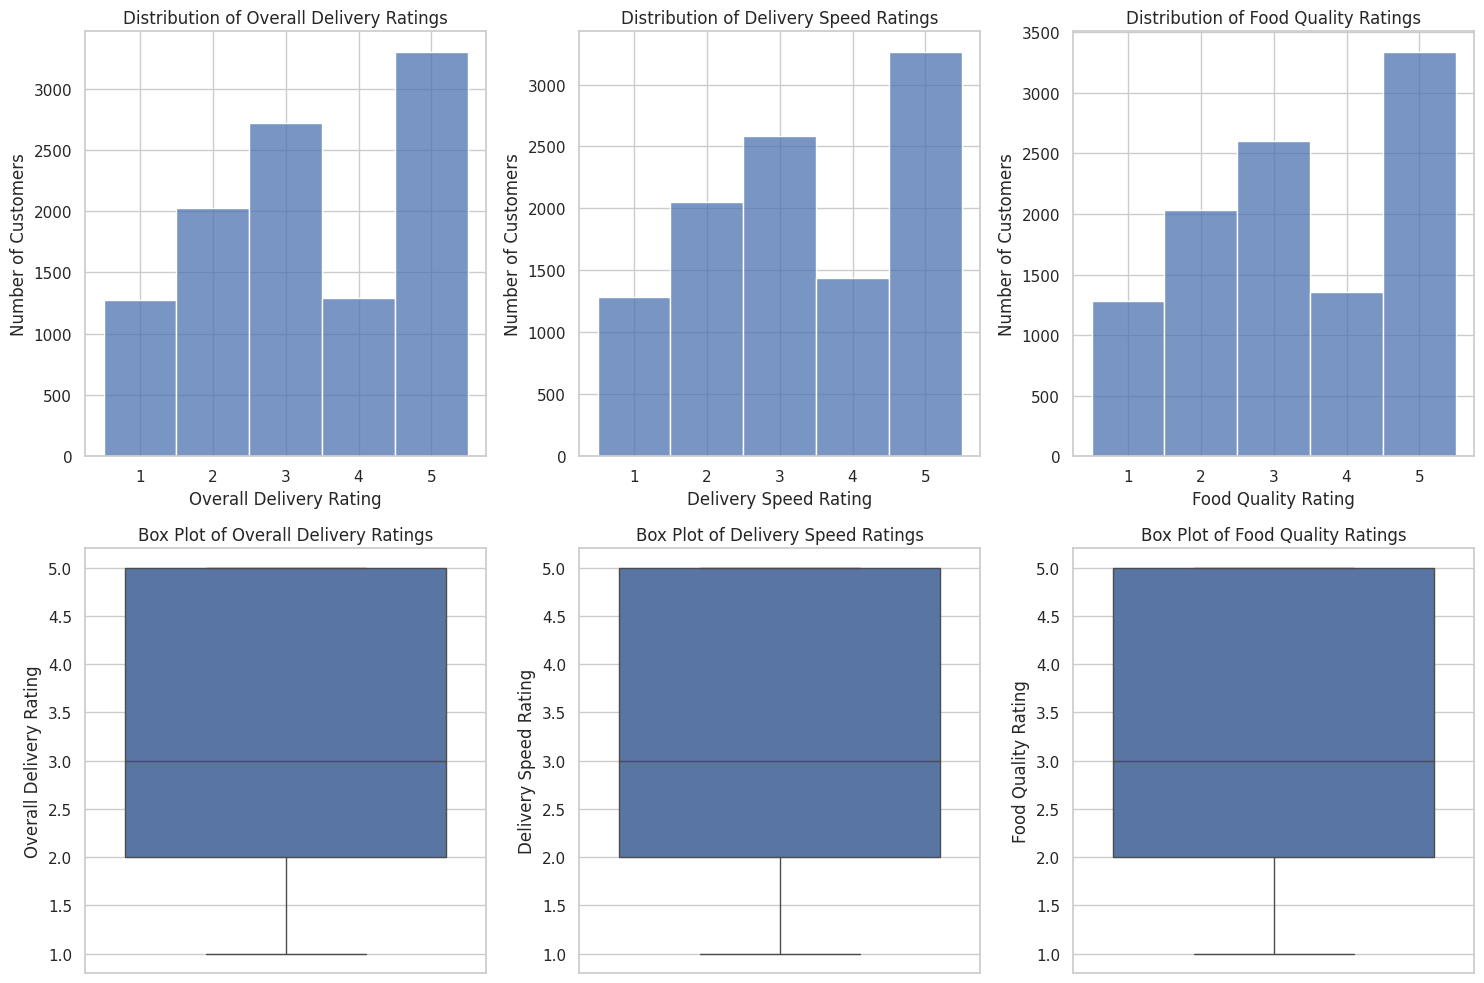

In [ ]:
# Rename columns correctly based on the provided image
cafe_df.columns = [
    "Customer",
    "Overall_Delivery_Experience",
    "Food_Quality",
    "Delivery_Speed",
    "Order_Accuracy"
]

# Convert rating columns to numeric values
cafe_df["Overall_Delivery_Experience"] = pd.to_numeric(cafe_df["Overall_Delivery_Experience"], errors='coerce')
cafe_df["Food_Quality"] = pd.to_numeric(cafe_df["Food_Quality"], errors='coerce')
cafe_df["Delivery_Speed"] = pd.to_numeric(cafe_df["Delivery_Speed"], errors='coerce')

# Import visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Set the visualization style
sns.set(style="whitegrid")

# Create figure and axes for subplots
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Histograms
sns.histplot(cafe_df["Overall_Delivery_Experience"], bins=5, discrete=True, kde=False, ax=axes[0, 0])
axes[0, 0].set_title("Distribution of Overall Delivery Ratings")
axes[0, 0].set_xlabel("Overall Delivery Rating")
axes[0, 0].set_ylabel("Number of Customers")

sns.histplot(cafe_df["Delivery_Speed"], bins=5, discrete=True, kde=False, ax=axes[0, 1])
axes[0, 1].set_title("Distribution of Delivery Speed Ratings")
axes[0, 1].set_xlabel("Delivery Speed Rating")
axes[0, 1].set_ylabel("Number of Customers")

sns.histplot(cafe_df["Food_Quality"], bins=5, discrete=True, kde=False, ax=axes[0, 2])
axes[0, 2].set_title("Distribution of Food Quality Ratings")
axes[0, 2].set_xlabel("Food Quality Rating")
axes[0, 2].set_ylabel("Number of Customers")

# Box plots
sns.boxplot(y=cafe_df["Overall_Delivery_Experience"], ax=axes[1, 0])
axes[1, 0].set_title("Box Plot of Overall Delivery Ratings")
axes[1, 0].set_ylabel("Overall Delivery Rating")

sns.boxplot(y=cafe_df["Delivery_Speed"], ax=axes[1, 1])
axes[1, 1].set_title("Box Plot of Delivery Speed Ratings")
axes[1, 1].set_ylabel("Delivery Speed Rating")

sns.boxplot(y=cafe_df["Food_Quality"], ax=axes[1, 2])
axes[1, 2].set_title("Box Plot of Food Quality Ratings")
axes[1, 2].set_ylabel("Food Quality Rating")

# Adjust layout for better visualization
plt.tight_layout()

# Show the plot
plt.show()

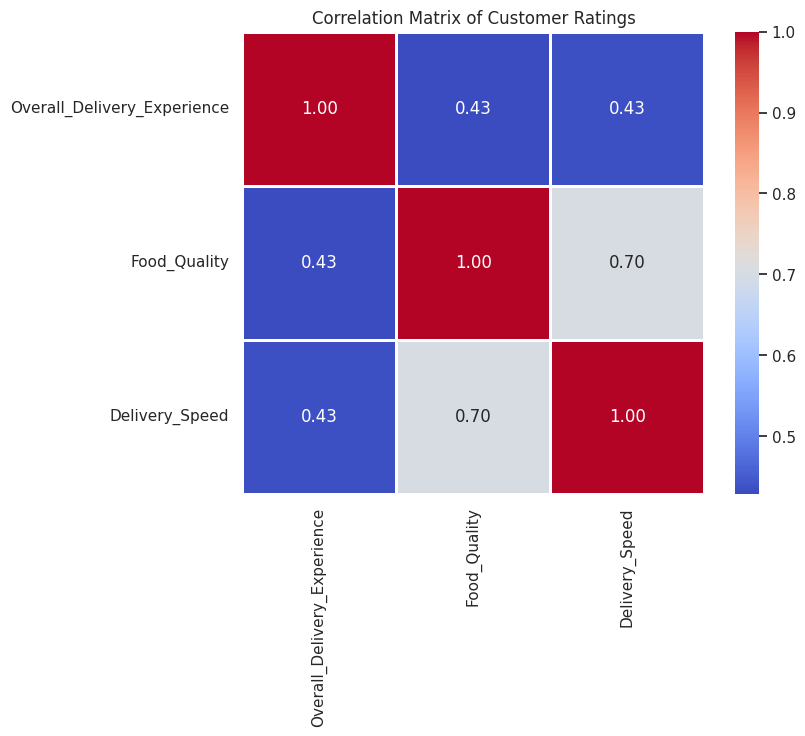

In [ ]:
import numpy as np

# Compute correlation matrix
correlation_matrix = cafe_df[["Overall_Delivery_Experience", "Food_Quality", "Delivery_Speed"]].corr()

# Create heatmap visualization
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=1, square=True)

# Title for heatmap
plt.title("Correlation Matrix of Customer Ratings")

# Show the plot
plt.show()